# Exercise 1

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

# Problem Overview

In this problem we will find eigenvalues of the 1D Schrödinger equation using numerical methods.

The time-independent Schrödinger equation in 1D can be written :

\begin{equation}
H \psi = E \psi \label{eq1}\tag{1}
\end{equation}

Where the Hamiltonian $H$ is given by 

$$
H = \frac{-\hbar^2}{2m}\frac{d^2}{dx^2} + V \tag{2}
$$

In order to find numerical solutions, we can divide the spatial dimension into $N$ discrete points, $x_i$, and evaluate $\psi$ at each one.  Given this, equation \ref{eq1} becomes a matrix equation, with $\psi$ an $N$-dimensional vector, and $H$ an $(N \times N)$ matrix.  We can then find the eigenvalues and eigenfunctions of the equation using numerical methods.

In order to define the matrix $H$, we can use a discrete approximation of the 2nd derivative :
$$
\frac{d^2}{dx^2} \psi(x_i) \rightarrow \frac{\psi_{i-1} - 2\psi_i + \psi_{i+1}}{(\Delta x)^2}
$$

where $(\Delta x)$ is the distance between discrete points $x_i$. We will choose dimensionless units for each problem, where $x$ is measured in terms of a length $a$, and $E$ is therefore measured in units of $\frac{\hbar^2}{2m a^2}$.  We can therefore write the kinetic energy term of the Hamiltonian as a "tri-diagonal" matrix $D$, which has the leading diagonal :

$$D_{i,i} = \frac{2}{(\Delta x)^2}$$

and the diagonals above and below this are :

$$D_{i,i+1} = D_{i,i-1} = \frac{-1}{(\Delta x)^2}$$

The potential term $V \psi$ can be represented by a matrix where the leading diagonal is the potential evaluated at the $i$-th point in space, $V_{i,i} = V(x_i)$, and all other entries are zero.

Given a potential, we construct the Hamiltonian matrix, $H=D+V$, and then use a numerical method to find the eigenvalues and eigenvectors of $H$.

## Part 1

The quantum harmonic oscillator is a good example to start with, since it has exact analytic solutions. The potential is :
$$V(x) = \frac{1}{2}m \omega^2 x^2$$

If we choose to measure $x$ in units of $\sqrt{\frac{\hbar}{m \omega}}$, then $E$ will be measured in units of $\frac{1}{2}\hbar \omega$, and the potential can be written :

$$V(x_i) = i^2 (\Delta x)^2 = x_i^2$$

You should write a function which takes as argument a discrete set of space points, $x_i$, (ie. an array), and returns the potential at each point, $V_i$ (another array).

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.integrate as integrate

# Create a function for the potential of the Quantum Harmonic Oscillator
def potential_qho(x):
    '''
    Parameters
    ----------
    x : A discrete set of spatial points.
        Must be of the form of a numpy array.

    Returns
    -------
    A numpy array of the potential, V, of the quantum harmonic oscialltor
    at each point along a discrete set of points, x.
    '''
    V = x**2      #no loop required as used numpy array, more efficient.    
    return V

Now test your function by plotting the results over a suitable range of $x$.

Decided over a range of -10 to 10 was suitable, as this shows the parabolic shape that is expected to be returned from the function.

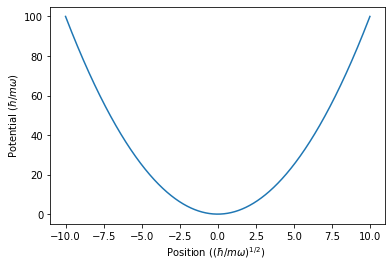

In [2]:
# Test case for potential, to check is working correctly
x_start = -10      
x_end = 10          
no_steps = 1000
x = np.linspace(x_start, x_end, no_steps)  #in future I will put the numbers straight into this function, as is straightfoward

# Plots potential against position
plt.plot(x, potential_qho(x))         
plt.xlabel('Position (($\hbar / m\omega)^{1/2}$)  ') 
plt.ylabel('Potential ($\hbar / m\omega)$')
plt.show()

# Part 2

Now write a function which, given the discrete space points $x_i$ and the potential $V_i$, constructs and returns the Hamiltonian matrix.

In [3]:
# Create a function for the Hamiltonian in Matrix form
def hamiltonian(x, V):  
    '''
    Parameters
    ----------
    x : A discrete set of spatial points.
        Must be of the form of a numpy array.
    V: A discrete set of potentials, for each space point.
        Must be of the form of a numpy array

    Returns
    -------
    The Hamiltonian, in the form of a square matrix, with the same length as x.
    '''   
    del_x = x[1]-x[0]   # Assuming the gap between all discrete points is constant
    d0 = np.eye(len(x),len(x), k = 0) * 2/del_x**2   # set the diagonal elements of KE matrix
    d1 = np.eye(len(x),len(x), k = 1) * -1/del_x**2  # set the above 1 diagonal elements of KE matrix
    d2 = np.eye(len(x),len(x), k = -1) * -1/del_x**2 # set the below 1 diagonal elements of KE matrix

    D = d0 + d1 + d2      # Kinetic Energy term of the Hamiltonian
    V_Matrix = np.eye(len(x),len(x), k = 0) * V   # Potential term of Hamiltonian
    H = D + V_Matrix   # Add together gives Hamiltonian    
    return H

Test your function by printing the matrix it returns.  You can use small $N$ and check a few elements by hand to ensure they are correct.

In [4]:
# Testing my Hamiltonian function is working correctly.
N = 6    # N steps, will give an NxN matrix
x = np.linspace(0,10, N)   
qho_V = potential_qho(x)
qho_H = hamiltonian(x, qho_V)
print('My Hamiltonian with N=6:\n', qho_H)

My Hamiltonian with N=6:
 [[  0.5   -0.25   0.     0.     0.     0.  ]
 [ -0.25   4.5   -0.25   0.     0.     0.  ]
 [  0.    -0.25  16.5   -0.25   0.     0.  ]
 [  0.     0.    -0.25  36.5   -0.25   0.  ]
 [  0.     0.     0.    -0.25  64.5   -0.25]
 [  0.     0.     0.     0.    -0.25 100.5 ]]


## My Handwritten Workings
$H[3,3] = D[3,3] + V[3,3]$ 

$D[3,3] = \frac{2}{\Delta x^2}$

$\Delta x$ = 2, therefore $D = 0.5$

$V[3,3] = x[3]^2 = (3\Delta x)^{2} = 6^{2} = 36$

$H[3,3] = 36 + 0.5 = 36.5$

This agrees with the result in the H[3,3] element of the matrix above.

In [5]:
#Also check with code from handwritten basics
for i in range(N):
    D33 = 2 / (x[1]-x[0])**2
    V33 = x[i]**2
    myH33 = D33 + V33 
    print(myH33 == qho_H[i][i]) 
# Checks every diagonal element in the matrix

True
True
True
True
True
True


# Part 3

Now find the first 10 eigenvalues of the quantum harmonic oscillator Hamiltonian using an appropriate scipy routine. You should use a large number of $x$ points, at least 1000, covering sufficient range that the wavefunction falls to zero at the extremities. You should compare the computed eigenvalues with the expected eigenvalues.

In [6]:
# Finds the first 10 eigenvalues and eigenvectors
x = np.linspace(-10,10,1000)   
qho_V = potential_qho(x)           
qho_H = hamiltonian(x, qho_V) # Hamiltonian for the QHO
n=10   # no eigenstates/values desired

# Returns values for eigenvalues and eigenvectors in ascending order, for first n eigenstates/vectors
qho_eigenvals, qho_eigenvectors = linalg.eigh(qho_H, subset_by_index = [0,n-1]) 
# subset means only gives first 10 eigenvalues and eigenstates, to increase efficiency of code

print('The first 10 eigenvalues of the quantum harmonic oscillator are: \n', qho_eigenvals)

The first 10 eigenvalues of the quantum harmonic oscillator are: 
 [ 0.99997495  2.99987474  4.99967433  6.99937369  8.99897283 10.99847173
 12.99787039 14.9971688  16.99636696 18.99546485]


## Expected Engery Eigenvalue Formulae
The cell below returns the expected first 10 energy eigenvalues of the quantum harmonic oscillator, using the equation 
$$
E_n = (n + \frac{1}{2}) \hbar \omega 
$$
in the natural units used in the problem. Our energy is in units $
\frac{1}{2}\hbar \omega$
as described in the exercise, therefore the equation for the energy eigenvalues becomes, $$E_n = 2(n + \frac{1}{2})$$

Equation from: https://quantummechanics.ucsd.edu/ph130a/130_notes/node153.html



In [7]:
# Check my eigenvalues against the expected eigenvalues.
n = np.linspace(0,9,10)
qho_E_n = (n+1/2) * 2   # multiplied by 2 as natural units.
print('The expected first ten eigenvalues returned from the quantum harmonic oscillator are: \n', qho_E_n)

#compare with our values
print('Calculated: \n', qho_eigenvals)
print()
print('Difference between expected and calculated: \n', qho_E_n - qho_eigenvals)   
# see very small difference so numerical approx is good

The expected first ten eigenvalues returned from the quantum harmonic oscillator are: 
 [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]
Calculated: 
 [ 0.99997495  2.99987474  4.99967433  6.99937369  8.99897283 10.99847173
 12.99787039 14.9971688  16.99636696 18.99546485]

Difference between expected and calculated: 
 [2.50507022e-05 1.25256023e-04 3.25672943e-04 6.26308994e-04
 1.02717171e-03 1.52826864e-03 2.12960731e-03 2.83119526e-03
 3.63304005e-03 4.53514920e-03]


Next you should plot the wavefunctions, ie. the eigenvectors.  Rather than plot the wavefunction directly, you should plot the probability density, which is given by $\psi^2$, and indicates the probability to find the particle at position $x$.

In [8]:
# create plotting function
def plotting(n, x, eigenvectors, xlabel, title ):  
    '''
    Parameters
    ----------
    n : An integer value of the number of graphs to plot
        Must be an integer
    x:  A discrete set of spatial points.
        Must be of the form of a numpy array.
    eigenvectors: An array of eigenvectors
                  Must be of the form of a numpy array
    title: A title for the graphs

    Returns
    -------
    Plots of the first n eigenvectors squared (probability desnsities) against position.
    Also prints the area under the wavefunction to see if it is normalised.
    '''   
    # plots n times
    for i in range(n):
        prob_density = eigenvectors[:,i] * np.conj(eigenvectors[:,i])  # equation to get probability density
        plt.plot(x, prob_density, label = 'n = {}'.format(i))          # plots probablilty density against position
        plt.xlabel(xlabel) 
        plt.ylabel('Probability Density')    # unitless so can put string already as same in all plots in this task
        plt.title(title)
        plt.legend()
        plt.show()
        print('The area under the wavefunction is', integrate.simpson(prob_density))
        tol = 0.0001    # Set a tolerance to see if wavefunction is normalised.
        if (1-tol) < integrate.simpson(prob_density) < (1 + tol):
            print('Therefore the wavefunction is normalised.')
        else:
            print('Therefore the wavefunction is not normalised.')
        # Checks if the wavefunction is normalised
        

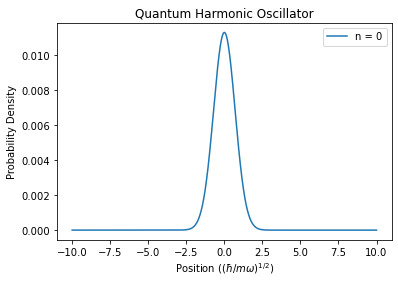

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


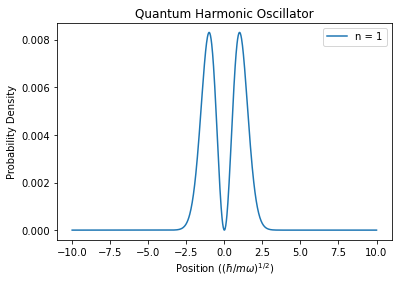

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


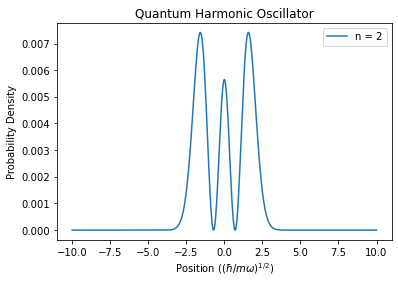

The area under the wavefunction is 0.9999999999999999
Therefore the wavefunction is normalised.


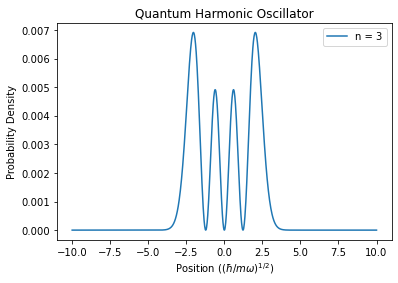

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


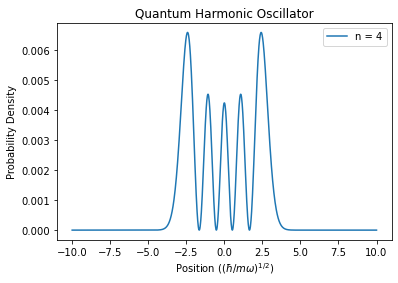

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


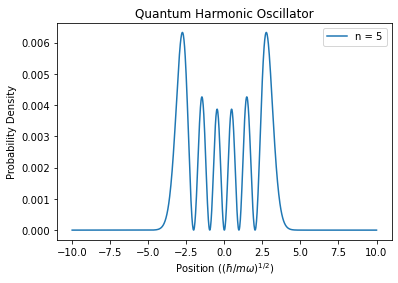

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


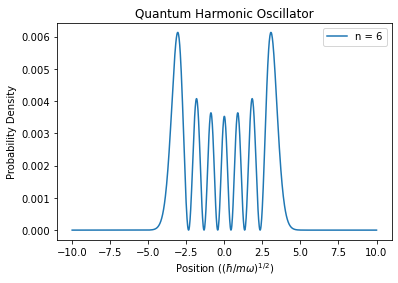

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


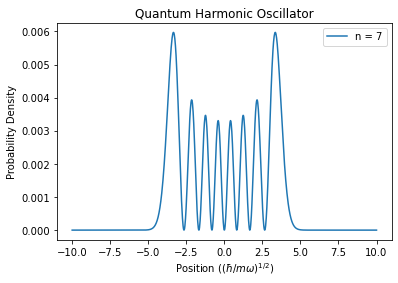

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


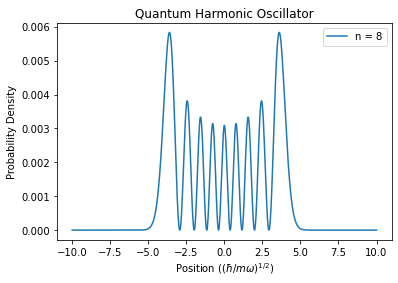

The area under the wavefunction is 1.0
Therefore the wavefunction is normalised.


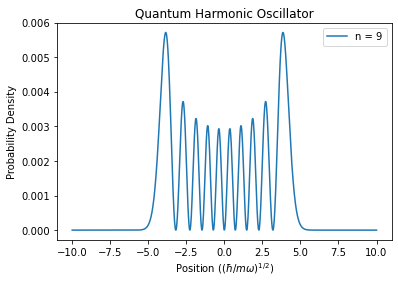

The area under the wavefunction is 0.9999999999999997
Therefore the wavefunction is normalised.


In [9]:
# plot the probability density against position for the first n eigenstates
x = np.linspace(-10,10,1000)
n = 10   
eigenvectors = qho_eigenvectors
xlabel = 'Position (($\hbar / m\omega)^{1/2})$'
title = 'Quantum Harmonic Oscillator'
plotting(n, x, eigenvectors,  xlabel, title)

# Part 4

Having verified our method, we can use it to find the eigenvalues of a more complex system - the Hydrogen atom.  In a spherically symmetric system, the wavefunction can be written :

$$\frac{1}{r}\Psi(r)Y_{lm}(\theta, \phi)e^{i m\phi}$$

where $Y_{lm}(\theta, \phi)$ are the spherical harmonic functions and l, m are the angular momentum quantum numbers. The radial function $\Psi(r)$ satisfies the time-independent Schrödinger equation, provided a suitable term is added to the potential.

If we use the Bohr radius $a_0$ as the unit $r$, where :
$$a_0 = \frac{4 \pi \epsilon \hbar^2}{m_e e^2}$$

then the energy will be measured in units of :
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$

and the potential for the hydrogen atom can be written :

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2}$$

Write a function which takes as argument a discrete set of points, $r_i$, and returns the potential $V_i$. You should use a range of $r$ such that the wavefunction become negligible - 200 Bohr radii should be sufficient.  Note that $r$ must now be positive.

In [10]:
# Create a function for the potential of the hydrogen atom.
def hydrogen_potential(r, l):
    '''
    Parameters
    ----------
    r : A discrete set of spatial points, physically radius from the atom centre.
        Must be of the form of a numpy array.
    l: The orbital angular momentum quantum number

    Returns
    -------
    A numpy array of the potential, V, of the quantum harmonic oscialltor
    at each point along a discrete set of points, x.
    '''
    V = -2/r + (l*(l+1)/r**2)
    return V

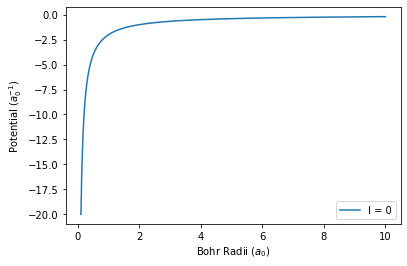

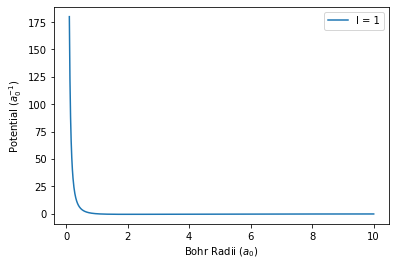

In [11]:
# plots the potential of the hydrogen atom against position for l=0 and l=1
r = np.linspace(0.1, 10, 1000)  

for l in range(2):
    plt.plot(r, hydrogen_potential(r, l),  label = 'l = {}'.format(l))        
    plt.xlabel('Bohr Radii ($a_0$)')
    plt.ylabel('Potential ($a_0^{-1}$)')
    plt.legend()
    plt.show()


Now re-use the `hamiltonian()` function to generate the Hamiltonian matrix for the Hydrogren atom, and find at least the first 5 eigenvalues for at least l=0. Compare these eigenvalues with the expected eigenvalues.

In [12]:
# Create the Hamiltonian of the hydrogen atom with l = 0 
r = np.linspace(0.2, 200, 1000)   
l = 0
n = 10
H0_V = hydrogen_potential(r, l)
H0_H = hamiltonian(r,H0_V)    # H denotes hydrogen atom, 0 denotes l = 0

# Find the first n eigenvalues and eigenstates of the hydrogen atom, with l=0
H0_eigenvals, H0_eigenvectors = linalg.eigh(H0_H, subset_by_index = [0,n-1])  
print('The first ten eigenvalues returned from the hydrogen atom, with l=0, are: \n ',  H0_eigenvals)

The first ten eigenvalues returned from the hydrogen atom, with l=0, are: 
  [-0.99019514 -0.24937811 -0.11098793 -0.06246099 -0.03998401 -0.02777007
 -0.020404   -0.01562233 -0.01231356 -0.00952555]


## Expected Eigenvalue Formulae
The expected eigenvalues of the Hamiltonian of the hydrogen atom are given by

$$
{\displaystyle E_{n}=-{\frac {m_e e^{4}}{32\pi ^{2}\varepsilon _{0}^{2}\hbar ^{2}N^{2}}}} 
$$

where $m_e$ is the electron mass, $e$ is the electron charge, $\epsilon_0$ is the permitivitty of free space, and $N=n+l$, where n is the nth eigenstate and l is the quantum number for orbital angular momentum.

(Equations from https://farside.ph.utexas.edu/teaching/qm/Quantum/node44.html and the 2nd Year TB2 Quantum Mechanics Course.)

The energy is measured in 
$$\frac{m_e e^4}{2 (4 \pi \epsilon_0)^2 \hbar^2}$$
therefore, the expected energy eigenvalues in the code will be
$$
E_n = \frac {1} {(n+l)^2}
$$

In [13]:
# compare the first n calculated and expected eigenvalues for the hydrogen atom, with l = 0
n = np.linspace(1,10,10)
Expected_eigv = -1/n**2
print('The expected first ten eigenvalues returned from the hydrogen atom are: \n', Expected_eigv)

# compare with my calculated values
print('Calculated: \n', H0_eigenvals)
print()
print('Difference between expected and calculated: \n', abs(Expected_eigv - H0_eigenvals)) #see very good approx

The expected first ten eigenvalues returned from the hydrogen atom are: 
 [-1.         -0.25       -0.11111111 -0.0625     -0.04       -0.02777778
 -0.02040816 -0.015625   -0.01234568 -0.01      ]
Calculated: 
 [-0.99019514 -0.24937811 -0.11098793 -0.06246099 -0.03998401 -0.02777007
 -0.020404   -0.01562233 -0.01231356 -0.00952555]

Difference between expected and calculated: 
 [9.80486407e-03 6.21894396e-04 1.23183201e-04 3.90137480e-05
 1.59872128e-05 7.71176567e-06 4.16335960e-06 2.67234383e-06
 3.21203979e-05 4.74446535e-04]


Finally, as for the quantum harmonic oscillator, plot the wavefunctions.

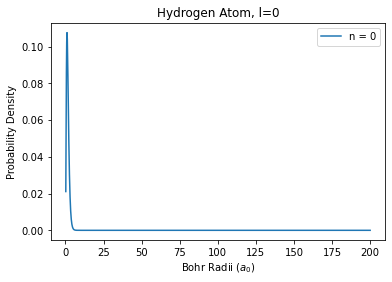

The area under the wavefunction is 0.9924226181067204
Therefore the wavefunction is not normalised.


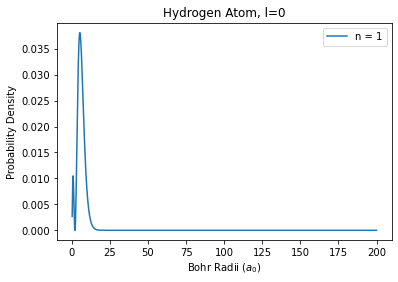

The area under the wavefunction is 0.999019318178015
Therefore the wavefunction is not normalised.


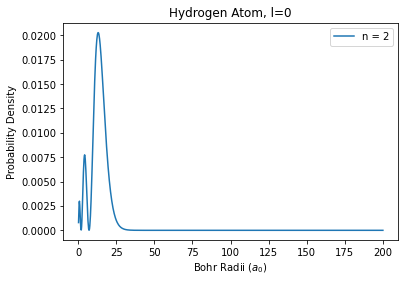

The area under the wavefunction is 0.9997075565794146
Therefore the wavefunction is not normalised.


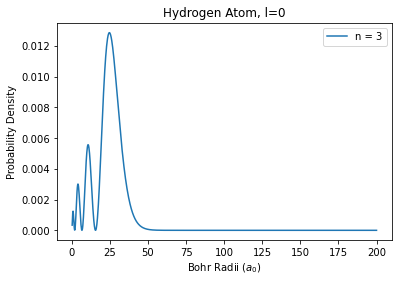

The area under the wavefunction is 0.999876348125233
Therefore the wavefunction is not normalised.


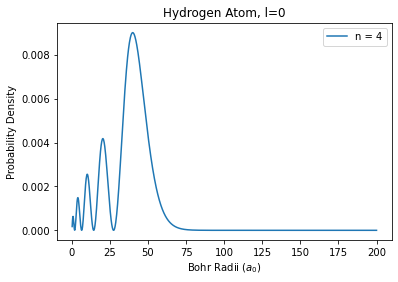

The area under the wavefunction is 0.9999366244293321
Therefore the wavefunction is normalised.


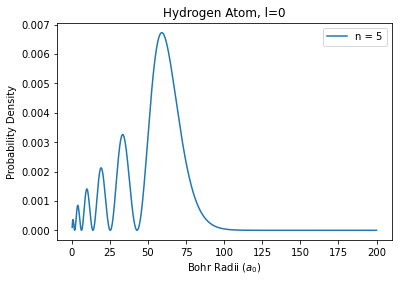

The area under the wavefunction is 0.999963303619969
Therefore the wavefunction is normalised.


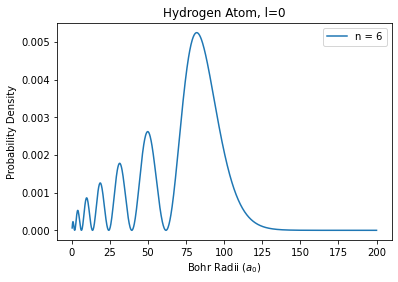

The area under the wavefunction is 0.9999768830406679
Therefore the wavefunction is normalised.


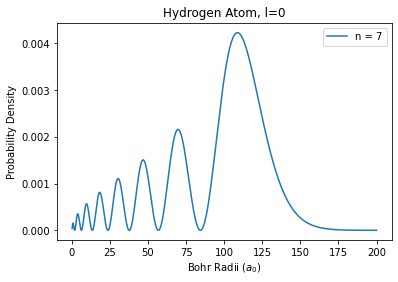

The area under the wavefunction is 0.9999845043238917
Therefore the wavefunction is normalised.


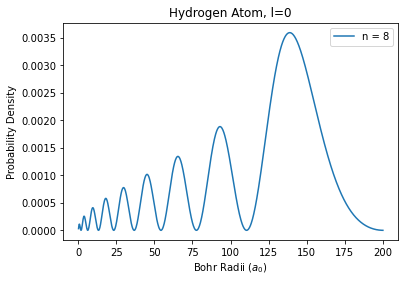

The area under the wavefunction is 0.9999886646589053
Therefore the wavefunction is normalised.


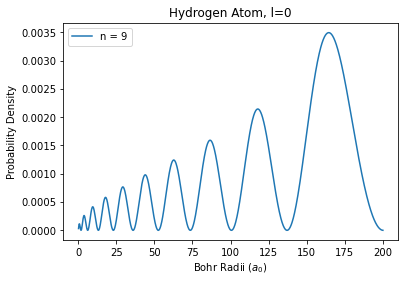

The area under the wavefunction is 0.9999883632437496
Therefore the wavefunction is normalised.


In [14]:
# plots the probability density against position for the first n energy eigenstates of the hydrogen atom, with l=0
n = 10
r = np.linspace(0.2, 200, 1000)  # r is unit Bohr Radius
x = r
eigenvectors = H0_eigenvectors
title = 'Hydrogen Atom, l=0'
xlabel = 'Bohr Radii ($a_0$)'
plotting(n, x, eigenvectors, xlabel , title)

### Plots for l=1

The first 10 eigenvalues of the hydrogen atom, with l=1, are: 
 [-0.25020961 -0.11120765 -0.06254973 -0.04002851 -0.02779552 -0.02041992
 -0.01563298 -0.01232413 -0.00955954 -0.00633199]


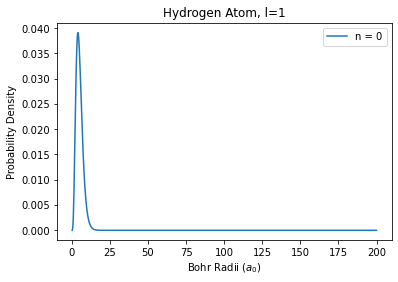

The area under the wavefunction is 1.0000056073507124
Therefore the wavefunction is normalised.


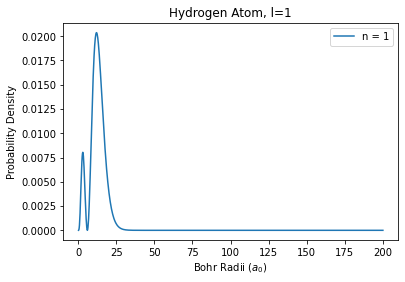

The area under the wavefunction is 1.0000019545767282
Therefore the wavefunction is normalised.


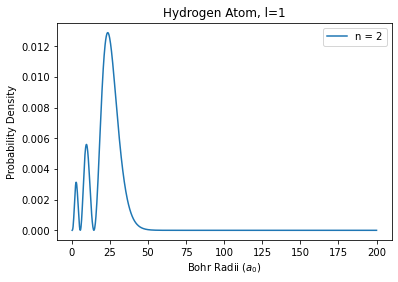

The area under the wavefunction is 1.000000867364083
Therefore the wavefunction is normalised.


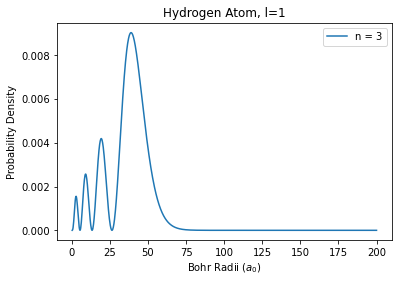

The area under the wavefunction is 1.0000004541585719
Therefore the wavefunction is normalised.


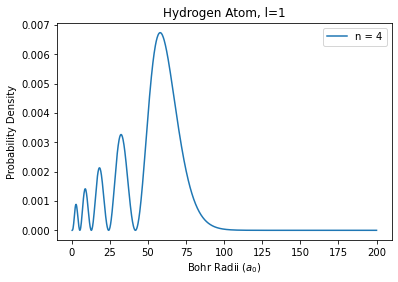

The area under the wavefunction is 1.0000002659709866
Therefore the wavefunction is normalised.


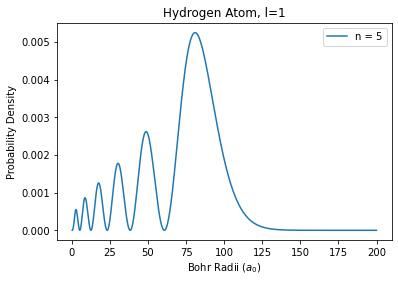

The area under the wavefunction is 1.0000001686812663
Therefore the wavefunction is normalised.


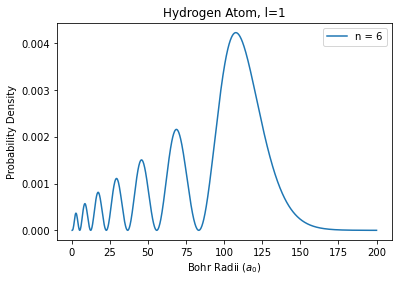

The area under the wavefunction is 1.0000001134943624
Therefore the wavefunction is normalised.


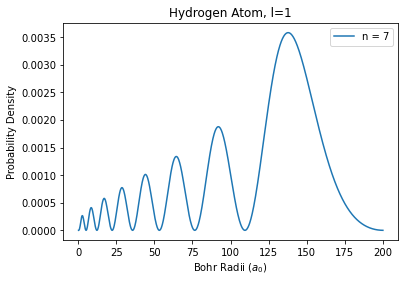

The area under the wavefunction is 1.0000000775952211
Therefore the wavefunction is normalised.


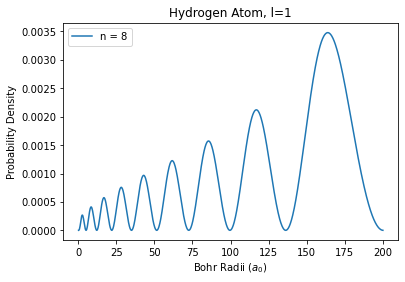

The area under the wavefunction is 1.0000000334043788
Therefore the wavefunction is normalised.


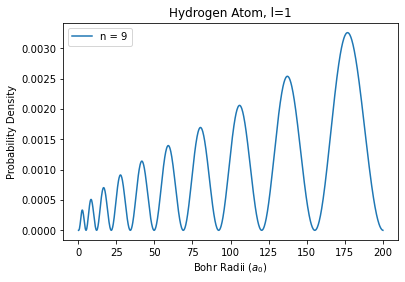

The area under the wavefunction is 0.9999999673427346
Therefore the wavefunction is normalised.


In [15]:
# Create the Hamiltonian of the hydrogen atom with l = 1 
r = np.linspace(0.2, 200, 1000) 
l = 1
n=10
H1_V = hydrogen_potential(r, l)
H1_H = hamiltonian(r,H1_V)

# Find the first n eigenvalues and eigenstates of the hydrogen atom, with l=1
H1_eigenvals, H1_eigenvectors = linalg.eigh(H1_H, subset_by_index = [0,n-1])
print('The first 10 eigenvalues of the hydrogen atom, with l=1, are: \n', H1_eigenvals)

# plots the probability density against position for the first n energy eigenstates of the hydrogen atom, with l=1
x = r
eigenvectors = H1_eigenvectors
title = 'Hydrogen Atom, l=1'
xlabel = 'Bohr Radii ($a_0$)'
plotting(n, x, eigenvectors, xlabel, title)

### Plots for l=2

The first 10 eigenvalues of the hydrogen atom, with l=2, are: 
 [-0.11111934 -0.06250781 -0.04000594 -0.02778212 -0.02041134 -0.01562723
 -0.01232493 -0.00960464 -0.00646286 -0.00259499]


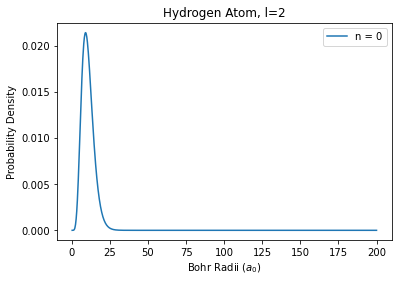

The area under the wavefunction is 1.000000003655389
Therefore the wavefunction is normalised.


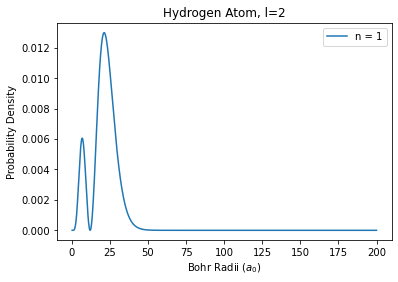

The area under the wavefunction is 1.0000000021919337
Therefore the wavefunction is normalised.


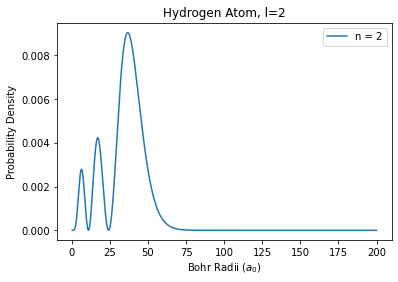

The area under the wavefunction is 1.0000000012861445
Therefore the wavefunction is normalised.


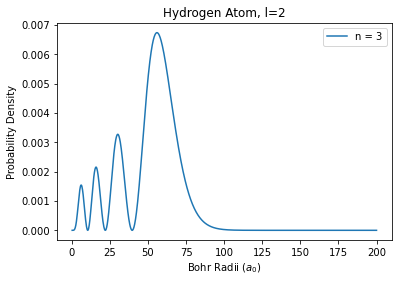

The area under the wavefunction is 1.0000000007973227
Therefore the wavefunction is normalised.


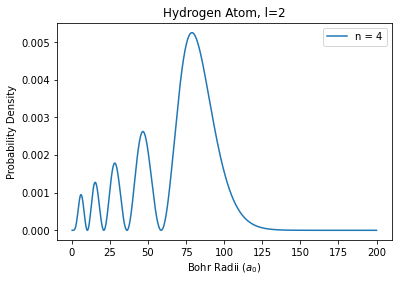

The area under the wavefunction is 1.0000000005225327
Therefore the wavefunction is normalised.


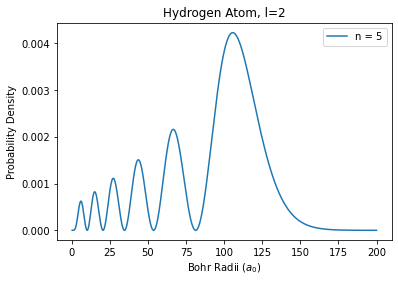

The area under the wavefunction is 1.000000000315206
Therefore the wavefunction is normalised.


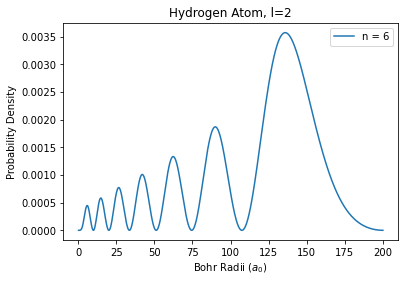

The area under the wavefunction is 0.9999999957676433
Therefore the wavefunction is normalised.


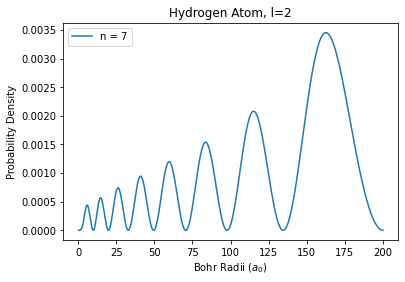

The area under the wavefunction is 0.9999999541352422
Therefore the wavefunction is normalised.


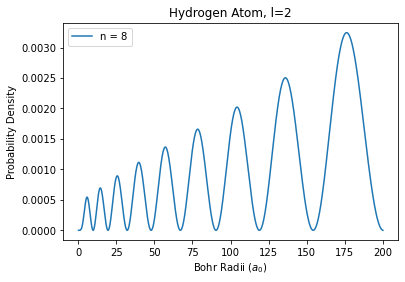

The area under the wavefunction is 0.9999998700541028
Therefore the wavefunction is normalised.


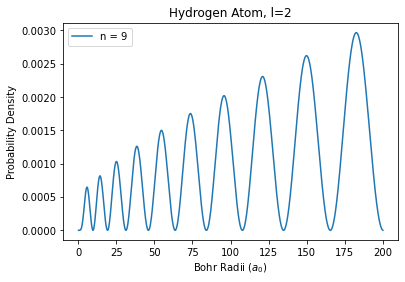

The area under the wavefunction is 0.999999771881506
Therefore the wavefunction is normalised.


In [16]:
# Create the Hamiltonian of the hydrogen atom with l = 2 
r = np.linspace(0.2, 200, 1000) 
l = 2
n=10
H2_V = hydrogen_potential(r, l)
H2_H = hamiltonian(r,H2_V)

# Find the first n eigenvalues and eigenstates of the hydrogen atom, with l=2
H2_eigenvals, H2_eigenvectors = linalg.eigh(H2_H, subset_by_index = [0,n-1])
print('The first 10 eigenvalues of the hydrogen atom, with l=2, are: \n', H2_eigenvals)

# plots the probability density against position for the first n energy eigenstates of the hydrogen atom, with l=2
x = r
eigenvectors = H2_eigenvectors
title = 'Hydrogen Atom, l=2'
xlabel = 'Bohr Radii ($a_0$)'
plotting(n, x, eigenvectors, xlabel, title)

The first 10 eigenvalues of the hydrogen atom, with l=3, are: 
 [-0.06250112 -0.04000155 -0.02777927 -0.02040944 -0.01562596 -0.01233013
 -0.00967082 -0.00665505 -0.00293216  0.00145743]


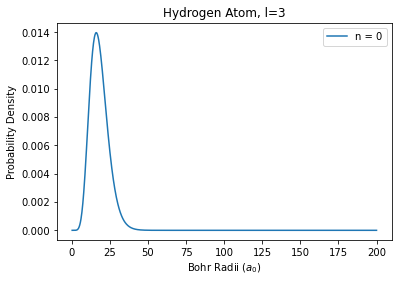

The area under the wavefunction is 1.000000000000438
Therefore the wavefunction is normalised.


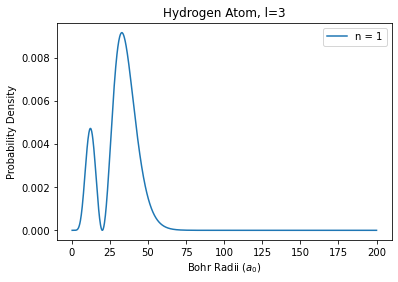

The area under the wavefunction is 1.000000000000376
Therefore the wavefunction is normalised.


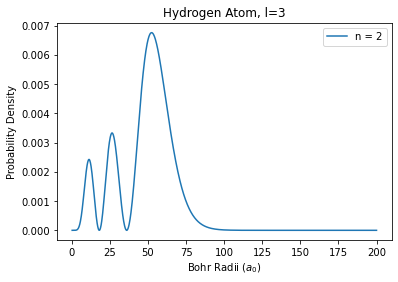

The area under the wavefunction is 1.0000000000002731
Therefore the wavefunction is normalised.


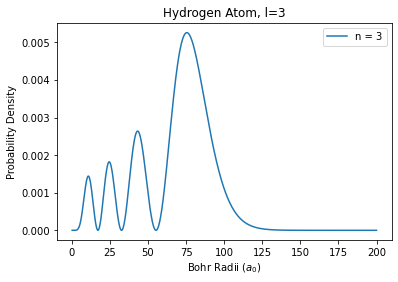

The area under the wavefunction is 1.0000000000001807
Therefore the wavefunction is normalised.


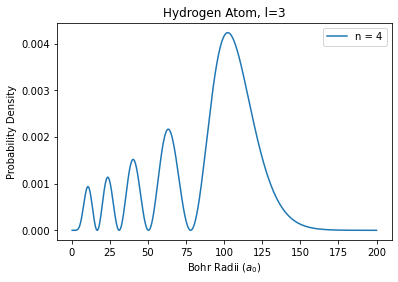

The area under the wavefunction is 0.9999999999727788
Therefore the wavefunction is normalised.


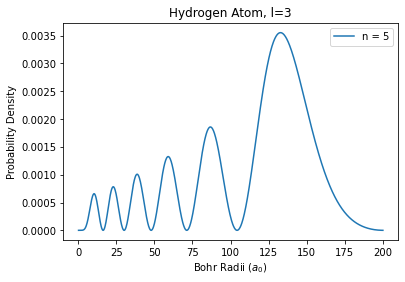

The area under the wavefunction is 0.9999999966438379
Therefore the wavefunction is normalised.


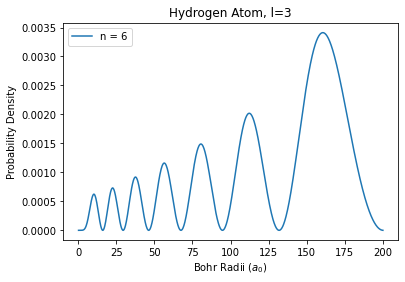

The area under the wavefunction is 0.9999999604539752
Therefore the wavefunction is normalised.


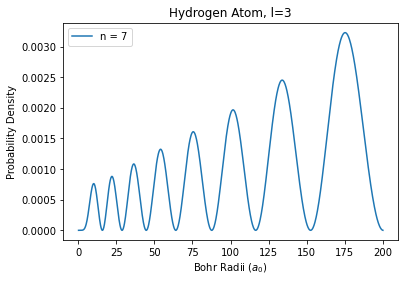

The area under the wavefunction is 0.9999998812082085
Therefore the wavefunction is normalised.


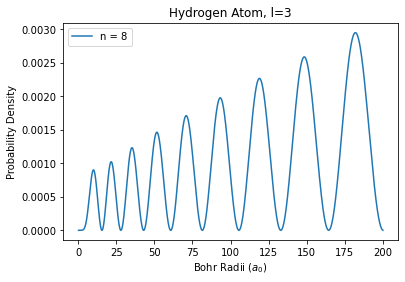

The area under the wavefunction is 0.9999997871359448
Therefore the wavefunction is normalised.


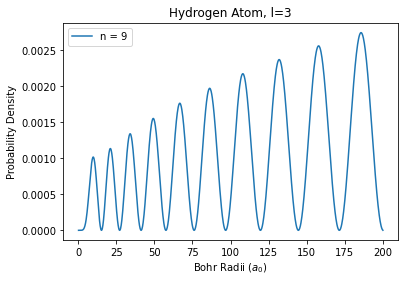

The area under the wavefunction is 0.9999996836619143
Therefore the wavefunction is normalised.


In [17]:
# Create the Hamiltonian of the hydrogen atom with l = 3
r = np.linspace(0.2, 200, 1000) 
l = 3
n=10
H3_V = hydrogen_potential(r, l)
H3_H = hamiltonian(r,H3_V)

# Find the first n eigenvalues and eigenstates of the hydrogen atom, with l=3
H3_eigenvals, H3_eigenvectors = linalg.eigh(H3_H, subset_by_index = [0,n-1])
print('The first 10 eigenvalues of the hydrogen atom, with l=3, are: \n',H3_eigenvals)

# plots the probability density against position for the first n energy eigenstates of the hydrogen atom, with l=3
x = r
eigenvectors = H3_eigenvectors
title = 'Hydrogen Atom, l=3'
xlabel = 'Bohr Radii ($a_0$)'
plotting(n, x, eigenvectors, xlabel, title)

# Part 5

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.

### Answer
This code solves the problems of the Quantum Harmonic Oscillator(QHO) and the hydrogen atom in quantum mechanics, finding the eigenvalues, eigenvectors and probability densities of both cases, using numerical approximations.

To do this I created 3 functions, 1 that returns the Hamiltonian in matrix form `hamiltonian()`, and 2 functions to find the potential of both the QHO and the hydrogen atom. All of the functions make use of the `numpy` library. In the two functions returning potential, I used numpy array features to allow me to efficiently calculate values of potential, and not have to run a 'for' loop. For the Hamiltonian I used the numpy function `np.eye` to allow me to fill in the diagonal and above and below diagonal elements of the matrix, allowing me to build a tri-diagonal matrix efficiently. I also created a `plotting` function, allowing me to create a range of different plots efficiently, which uses the plotting library `matplotlib`.

I tested the 3 functions individually. I tested the `potential_qho()` function by plotting it over a range of x-distance -10 to +10, with 1000 discrete points in between. With the potential of the QHO being of the form

$$
V(x_i) =  x_i^2 \tag{1} 
$$

I tested it over this range as it should return a parabolic function, so it can simply be visually tested.

I also tested the `hydrogen_potential()` function for cases of $l=0$ and $l=1$, by plotting this over a radius range of 0.2 to 10, as else there is a divide by zero error, and a negative radius would be unphysical. When $l=0$, the function is expected to go as $-1/r$, and when $l>0$ it is expected to go as $1/r{^2}$, as 

$$V(r_i) = \frac{-2}{r_i} + \frac{l(l+1)}{r_i^2} \tag{2}$$

These characteristics were fulfilled in the plots I produced, showing the functions satisfy the test cases.

For the Hamiltonian, I tested some elements of the matrix by hand, and by code as seen in the cells above, and the funtion `Hamiltonian()` passed the test cases.

With the Hamiltonian built, I used `scipy.linalg` routines to find its eigenstates and eigenvalues. I used the `linalg.eigh()` to calculate the eigenvectors and eigenvalues. I used this function specifically as it returns the eigenvalues and eigenvectors in ascending order, which allowed me to use the parameter 'subset_by_index' to only have the first 10 eigenvalues and eigenvectors returned. I used this same method for both the QHO and the hydrogen atom.

I compared the eigenvalues with those expected from theory, using the equation $$E_n = (n + \frac{1}{2}) \hbar \omega \tag{3}$$
for the QHO, and
$$
{\displaystyle E_{n}=-{\frac {m_e e^{4}}{32\pi ^{2}\varepsilon _{0}^{2}\hbar ^{2}n^{2}}}} \tag{4}
$$
for the hydrogen atom. 

These equations reduce nicely for both cases, using the natural units that are used in this exercise, to
$$
E_n = 2(n + \frac{1}{2}) \tag{5}
$$
for the QHO and
$$
E_n = \frac {1} {(n+l)^2} \tag{6}
$$
for the hydrogen atom. Sources of these equations are stated when initially used above. 

I compare these values to the values that are calculated in the my numerical approximation in a cell above for the first 10 eigenvalues, which results in the largest discrepancy between the expected and calculated values being of order $10^{-3}$, for both the QHO and hydrogen atom. This shows that the numerical approximation method has accurately calculated the eigenvalues of the Hamiltonian in both cases.

The energy eigenvalues of the hydrogen atom shift their start by 1 as the orbital angular momentum quantum number, l, increases by 1, as can be seen in the results above, i.e. $E_1(l=0) = E_0(l=1)$. This agrees with equation 6 stated above, and physically makes sense as the electron of the hydrogen atom has a larger energy if it has a larger orbital angular momentum.

The eigenvectors of the Hamiltonian can be squared to give a probability density. I plot this probability density against position, for eigenvalues in the range n=0 to n=9 for both the QHO and the hydrogen atom. These plots can then be compared with the expected probability densities of the QHO and hydrogen atom. I also check whether the probability density is normalised, using the `simpson` funtion from `scipy.integrate`.

The plots for the QHO look as would be expected for the first ten energy eigenvectors, showing that overall, the numerical approximation of the QHO has yielded results compatible with the theoretical results, to a high level of accuracy. It can be seen that as n, and subsequently energy, increases, the probability density spreads over a wider range of position, which physically makes sense as the particle has more energy, so it can spread further from the centre. The plots obey the form 
$$
u_n(x) = A_nV_ne^{(-x^2/2a^2) }
$$
where $u_n$ is the energy eigenstate, $A_n$ is a normalisation constant, $V_n$ are Hermite Polynomials and the exponential term represents a Gaussian envelope. This equation is from the 2nd Year Quantum Mechanics TB1 course.

For the hydrogen atom, I have plotted the probability densities associated with the first ten energy eigenvalues for l=0,1,2,3. These look as would be theoretically expected for the hydrogen atom, physically representing the probability of finding the electron further from the centre (r=0) increasing as the energy eigenvalue (and subsequently energy) increases. The plots are over a range of Bohr radii of 0.2 to 200 with 1000 steps (0.2 intervals), as starting from 0 would create a divide by zero error, and starting from 0.2 means starting from one interval into the array, which gives optimal eigenvalue results. Physically, starting from closer than this isn't optimal as it represents an electron falling on the nucleus, localising the electron. As quantum number $l$ increases, the oscillation peaks shift further from the centre of the atom, which is physically expected, as a larger angular momentum quantum number, means a larger energy, and therefore the electron can be further from the centre of the atom.

Overall, this numerical approximation provides accurate solutions for both the quantum harmonic oscillator and the hydrogen atom energy eigenstates and eigenvalues. 

